# Вступ

Загальна ідея лінійних моделей (Логістична/лінійна) регресія -- це оптимізація функції втрат, для гіпотези
$$h_{linreg} = w_0 + w_1x $$
$$h_{logreg} = \sigma(h_{linreg})$$

Але існують і інші класичні підходи до вирішення задач класифікації або регресії.

За типом алгоритма, можно виділити такі основні алгоритми, як:
1. Лінійні ( [Лінк_1](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), [Лінк_2](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm))
2. Деревоподібні ( [Лінк_1](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree))
3. Метричні ([Лінк_1](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors))
4. Байесові ([Лінк_1](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes))
5. Ансамблеві ([Лінк_1](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [Лінк_2](https://xgboost.readthedocs.io/en/stable/))

та інші.

![alt text](https://www.kdnuggets.com/wp-content/uploads/nisha-logistic-regression-classification_2.png)

# SVM (Support Vector Machine)

## Загальна теорія

Метод опорних векторів (Support Vector Machine, SVM) - це алгоритм машинного навчання для класифікації та регресії, який працює шляхом знаходження гіперплощини, що найкраще розділяє два або більше класи даних.

У SVM зображення даних представляються у вигляді векторів у n-вимірному просторі (де n - кількість ознак у даних), і для розділення класів шукається гіперплощина (тобто (n−1)-вимірна площина у n-вимірному просторі), що максимально відділяє класи один від одного.

Оскільки може бути декілька таких гіперплощин, то SVM знаходить ту, яка максимізує мінімальну відстань між гіперплощиною та найближчими до неї точками обох класів (це відстань називається "мінімальною шириною розділяючої полоси" або "margin").

![alt text](https://miro.medium.com/v2/resize:fit:848/1*VF_oqrRmgVdtAizny5T3-A.gif)

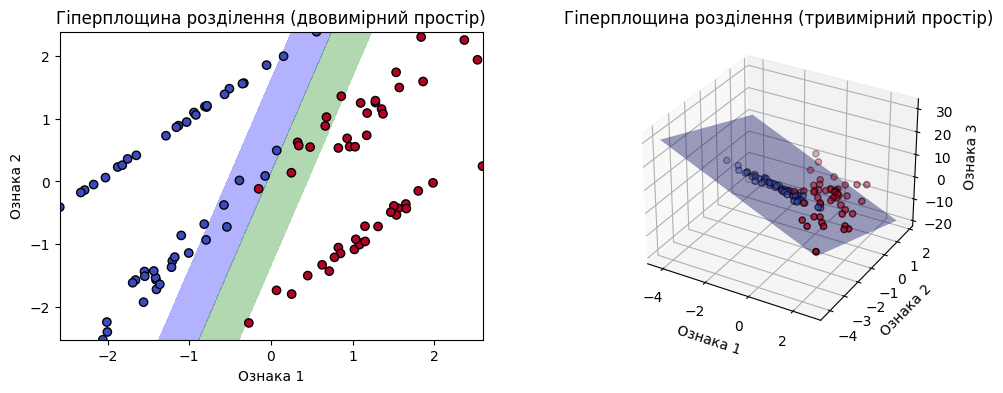

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

# Створення випадкових даних для двовимірного простору
X_2d, y_2d = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Тренування моделі LinearSVC
clf_2d = LinearSVC()
clf_2d.fit(X_2d, y_2d)

# Створення випадкових даних для тривимірного простору
X_3d, y_3d = make_classification(n_samples=100, n_features=3,n_informative=3, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Тренування моделі LinearSVC
clf_3d = LinearSVC()
clf_3d.fit(X_3d, y_3d)

# Візуалізація для двовимірного простору
plt.figure(figsize=(12, 4))

# Підготовка точок для візуалізації гіперплощини
xx, yy = np.meshgrid(np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100),
                     np.linspace(X_2d[:, 1].min(), X_2d[:, 1].max(), 100))
Z = clf_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Візуалізація гіперплощини та точок
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'green', 'red'])
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap='coolwarm', edgecolors='k')
plt.title('Гіперплощина розділення (двовимірний простір)')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

# Візуалізація для тривимірного простору
ax = plt.subplot(1, 2, 2, projection='3d')

# Визначення гіперплощини
xx, yy = np.meshgrid(np.linspace(X_3d[:, 0].min(), X_3d[:, 0].max(), 100),
                     np.linspace(X_3d[:, 1].min(), X_3d[:, 1].max(), 100))
zz = (-clf_3d.coef_[0, 0] * xx - clf_3d.coef_[0, 1] * yy - clf_3d.intercept_) / clf_3d.coef_[0, 2]
ax.plot_surface(xx, yy, zz, alpha=0.4, color='blue')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_3d, cmap='coolwarm', edgecolors='k')
ax.set_title('Гіперплощина розділення (тривимірний простір)')
ax.set_xlabel('Ознака 1')
ax.set_ylabel('Ознака 2')
ax.set_zlabel('Ознака 3')

plt.show()

## Класифікація

![alt text](https://www.mlfactor.com/images/svm.png)

Існує 2 гіпотези.
1. Лінійно розділимі класи. (Жорстке розділення (Hard Margin))
2. Лінійно не розділимі класи.(М'яке розділення (Soft Margin))

Гіпотеза:

**Жорстке розділення (Hard Margin)** у методі опорних векторів (SVM) вказує на той випадок, коли модель намагається знайти гіперплощину, яка ідеально розділяє навчальні дані без будь-яких помилок класифікації. В ідеальному випадку, всі точки одного класу повинні знаходитися на одному боці гіперплощини, а всі точки іншого класу - на іншому боці.

$$\begin{cases}
&w \cdot x^{(i)} + b \geq 1, \quad \text{якщо} \quad y^{(i)} = 1 \\
&w \cdot x^{(i)} + b \leq -1, \quad \text{якщо} \quad y^{(i)} = 0 \\
\end{cases}$$

Суть задачі сходиться до того, що потрібно максимізувати мінімальну відстань між гіперплощиною та найближчими до неї точками обох класів (margin) за допомогою додатковийї векторів (найближчих класів).

$$ L = |x_+-x_-|⋅cosα = ω⋅(x_+-x_-)/ ||ω||^2 --> max $$
тоді велечина margin
$$ M_i = y_i⋅(ω⋅x)-b $$
$$\begin{cases}
& M_i> 0\quad \text{при вірній класифікації} \\
& M_i< 0\quad \text{при невірній класифікації} \\
\end{cases}$$

Т.к. можно ввести такий коефіціент $α > 0$, який при підборі  буде давати велечину відступу равною одиниці $αM=1$ переписати у вигляді
$$ω⋅(x_+-x_-) = 1 - (-1) = 2 $$
$$L = 2/ ||ω||^2--> max  $$

Для лінійно розділимих класів задача виглядає ось так
$$\begin{cases}
&L = (1/2) ||ω||^2--> min \\
&M_i(ω,b)>=1\\
\end{cases}$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1024px-SVM_margin.png)


М'яке розділення
$$\begin{cases}
&{cost}_1 = \max(0, 1 - (w \cdot x^{(i)} + b)), \quad \text{якщо} \quad y^{(i)} = 1\\
&{cost}_0 = \max(0, 1 + (w \cdot x^{(i)} + b)), \quad \text{якщо} \quad y^{(i)} = 0\\
\end{cases}$$

Для загального случая, лінійно не розділимих класів. Ми вводимо параметр $ξ$ >=0(slack variables) величина можливої похибки. Тоді
$$ M_i >= 1 - ξ $$
$$ (ξ)  -> 0$$


$$\begin{cases}
&(1/2) ||ω||^2 + С\sum_{i=1}^l\xi_i -> min \\
&M_i(ω,b)>=1-ξ_i\\
&ξ >=0\\
\end{cases}$$
або
$$\begin{cases}
&(1/2) ||ω||^2 + С\sum_{i=1}^l\xi_i -> min \\
&ξ_i>=1-M_i(ω,b)\\
&ξ >=0\\
\end{cases}$$
Якщо все нерівність перевести у рівнняння, тоді ми отримаємо єдине рішення оптимізації

$$L(ω, b)=(1-M(ω,b)) $$

![alt text](https://miro.medium.com/v2/resize:fit:1358/1*M_3iYollNTlz0PVn5udCBQ.png)


Функція втрат для загального випадка (hinge loss):
$$(1/2) ||ω||^2 + С\sum_{i=1}^l(1-M(ω,b)) -> min$$
Cуть hinge loss в тому, що вона починає штрафувати об'єкти e яких відступ <1

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20231109124420/1-(1).png)

![alt text](https://www.researchgate.net/publication/236150927/figure/fig5/AS:669388852191237@1536606147222/Loss-functions-for-commonly-used-classifier-hinge-loss-SVM-cross-entropy-loss.ppm)

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*a46Tz42Epfu3ysFnvWpzWQ.gif)

Оптимізаційна задача (умова Каруша-Куна-Таккера)

https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(C=1.0,
                     probability = True,
                     tol = 0.0001,
                     random_state=42)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Support Vector Machines, Illustrated

https://towardsdatascience.com/support-vector-machines-illustrated-b48a32c56388

## Регресія

Гіпотеза методу опорних векторів для регресії (Support Vector Regression, SVR) полягає у використанні гіперплощини для апроксимації функції регресії. Головна ідея полягає в тому, що модель намагається побудувати гіперплощину, яка пройде якнайближче до навчальних даних і в той же час буде максимально можливою віддаленою від цих точок.
$$\text{Гіпотеза: } f(x) = w \cdot x + b$$

$$min J(w,b,ξ,ξ^*)= 1/2​∣∣w∣∣^2+C∑_{i=1}^n​(ξ_i+ξ_i^∗​)$$

за умови:

$$ y^{(i)} - (w \cdot x^{(i)} + b) \leq \epsilon + \xi_i \\
 (w \cdot x^{(i)} + b) - y^{(i)} \leq \epsilon + \xi_i^* \\
 \xi_i, \xi_i^* \geq 0$$
де:
-  w - ваговий вектор,
-  b - зсув,
- $\xi_i, \xi_i^*$ - відхилення для \( i \)-го зразка,
-  C - гіперпараметр, який контролює трейдоф між мінімізацією величини ||w|| та мінімізацією суми відхилень,
- $\epsilon$ - параметр ширини коридору,
- n - кількість зразків у навчальному наборі.

![image.png](https://miro.medium.com/v2/resize:fit:894/1*F0SvFUJxql-H1hYW0j57eA.png)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr_regressor = SVR(C=1.0,
                     tol = 0.0001
                    )

svr_regressor.fit(X_train_scaled, y_train)

y_pred = svr_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

HTTPError: HTTP Error 403: Forbidden

In [ ]:
import pandas as pd
pd.Series(y_test).describe()

# Kernel trick

Ось ми розібрались, як побудувати лінійний класифікатор за допомогою методу опорних векторів. Проте, як ми знаємо, часто ми не можемо лінійно розділити наші дані.Для цього ми повинні перейти до нового простору ознак, раніше ми займались створенням нових фіч, таких як $x^2$ чи $x^3$, у такому випадку ми повинні перевести всі наші дані у новий векторний простір доповнений новими штучно створеними ознаками. Та це може бути досить дорого з точки зору обчислень, а ядровий трюк полягає у тому, що ми не робимо трансформацію даних, щоб відобразити їх у новому векторному просторі, а лише розраховуємо відстані між векторами так, наче ми вже перебуваємо у цьому просторі.

Це досягається за допомогою ядерної функції, яка обчислює скалярний добуток між векторами у вищорозмірному просторі, не потребуючи безпосереднього перетворення даних у цей простір. Це дозволяє SVM працювати зі складними нелінійно-роздільними даними, зберігаючи при цьому швидкість роботи алгоритму.

![alt image](https://miro.medium.com/v2/resize:fit:1400/1*Ha7EfcfB5mY2RIKsXaTRkA.png)

## Як це працює?

Один з прикладів, це геометрія Лобачевського. В цій геометрії **паралельні прямі на сфері у напряму полюсів перетинаються**.
https://uk.wikipedia.org/wiki/Геометрія_Лобачевського

![alt text](https://upload.wikimedia.org/wikipedia/commons/4/40/Earth_geo.png)

Та це може бути досить дорого з точки зору обчислень, а ядровий трюк полягає у тому, що ми не робимо трансформацію даних, щоб відобразити їх у новому векторному просторі, а лише розраховуємо відстані між векторами так, наче ми вже перебуваємо у цьому просторі.


![alt text](https://images.squarespace-cdn.com/content/v1/60bf6a0ed36614062037a08b/1632584076683-AV0U98J857F1H7ULSQV5/kernel.001.png
)

![alt text](https://images.squarespace-cdn.com/content/v1/51af568be4b0b9ab836e2474/1444336855902-ADDXYGDYK7AETAYN587O/image-asset.gif)

## Типи ядер

**Лінійна функція ядра**:
$$ K(x, y) = x \cdot y$$

**Поліноміальна функція ядра**:
$$K(x, y) = (x \cdot y + r)^d$$

де $r $- константа зміщення, $d $ - ступінь полінома.

**Радіальна базисна функція (RBF) ядра**:
$$ K(x, y) = \exp\left(-\gamma \cdot \lVert x - y \rVert^2\right) $$

де $ \gamma $ - параметр ширини гаусівської функції.

**Сигмоїдальна функція ядра**:
$$ K(x, y) = \tanh(\alpha \cdot x \cdot y + r)$$

де $ \alpha $ - параметр швидкості зростання, $ r $ - константа зміщення.

## RBF

Розглянемо найпоширініше. Гаусівське ядро, або як ще кажуть радиально базисну функцію (RBF).
$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Де символи μ та σ позначають математичне очікування та стандартне відхилення відповідно. Тоді як ядрова функція радіального базису має такий вигляд:
$$ K(x, y) = e^{-\gamma \cdot \lVert x - y \rVert^2}$$

Ну і якщо ми зробимо такі заміну $γ= 1/(2σ^2)​$, то побачимо що дані функції відрізняються лише множенням на скаляр.

Проте як саме працює ядровий трюк? Як ми бачимо з визначенням ядрових функції в розрахунках ми використовуємо два вектори $\vec{x}$ та $\vec{y}$ і ми розраховуємо відстань між ними у новому лінійному просторі. А далі, у якості нових ознак для нашої моделі, описаної вище, ми будемо брати нові ознаки - відстані між нашими приклади розраховані за допомогою нашої ядрової функції. Формалізуємо вище сказане твердження:
$$f_j^{(i)} = K(x^{(i)}, x^{(j)}) = e^{-\gamma \lVert x^{(i)} - x^{(j)} \rVert^2}$$

Отже тепер ми маємо замість вектора $x^{(i)}$, є новий $f^{(i)}$ тепер будемо використовувати нові ознаки і в новому просторі шукати розподільчу полосу і максимізувати її ширину.

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*kO_kAQ32-qmT-iljdZdkrQ.png)

## Приклад

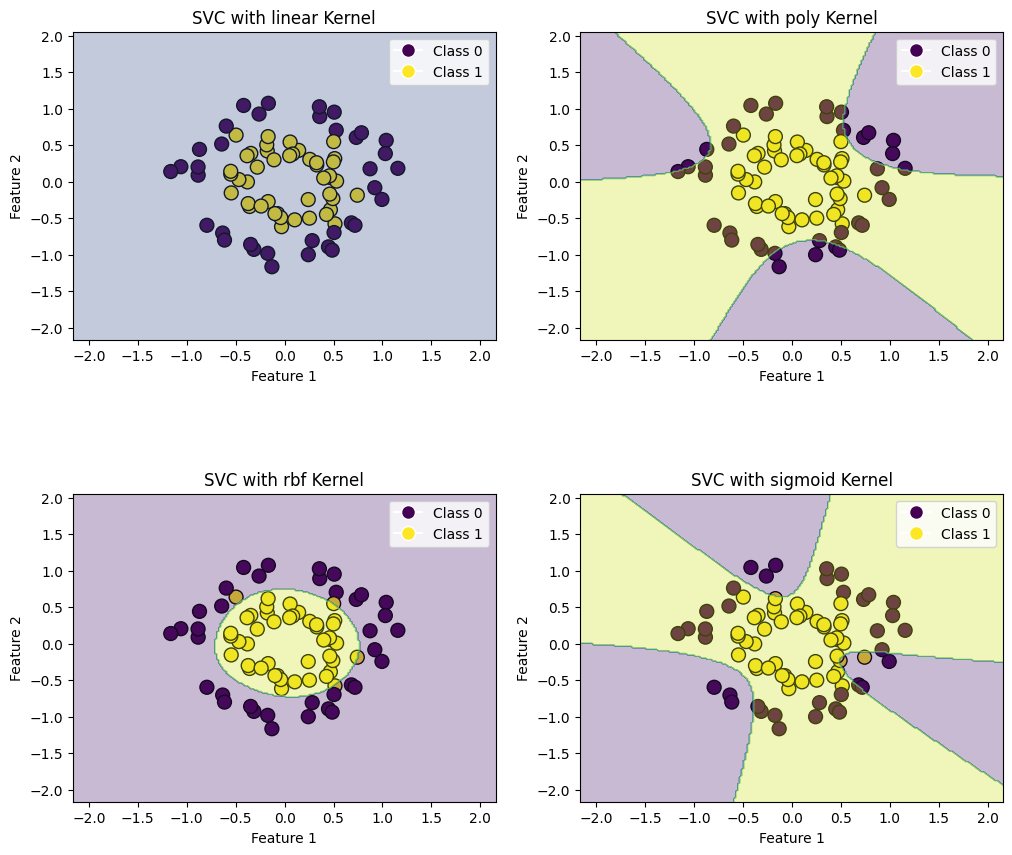

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Завантаження датасету "Кола" для класифікації
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функція для навчання та візуалізації моделі з легендою
def train_and_visualize_kernel(X_train, y_train, kernel_type, ax):
    # Ініціалізація та навчання моделі SVC з вказаним типом ядра
    model = SVC(kernel=kernel_type, random_state=42)
    model.fit(X_train, y_train)

    # Візуалізація рішення моделі
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o', s=100, label='Training Data')

    # Створення сітки для візуалізації рішення моделі
    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Візуалізація контуру рішення моделі
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    contour = ax.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

    ax.set_title(f'SVC with {kernel_type} Kernel')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Додавання легенди для класів
    legend_labels = np.unique(y_train)
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(legend_labels[i])), markersize=10, label=f'Class {legend_labels[i]}') for i in range(len(legend_labels))]
    ax.legend(handles=legend_handles, loc='best')

# Приклади різних ядерних трюків
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for kernel, ax in zip(kernels, axs.flatten()):
    train_and_visualize_kernel(X_train, y_train, kernel, ax)

plt.show()